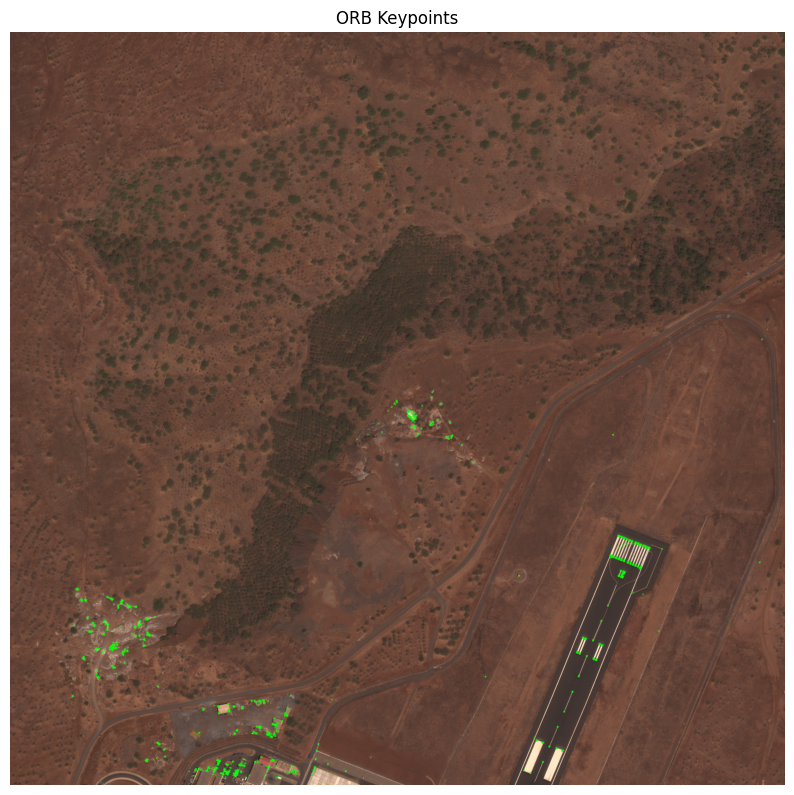

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# === Шаг 1: Загрузка изображения ===
image_path = "images/train_images/8.tif"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# === Шаг 2: Детектирование ключевых точек с ORB ===
orb = cv2.ORB_create(nfeatures=2000)
keypoints = orb.detect(gray, None)

# === Визуализация точек интереса ===
img_with_kp = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
plt.figure(figsize=(10, 10))
plt.title("ORB Keypoints")
plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

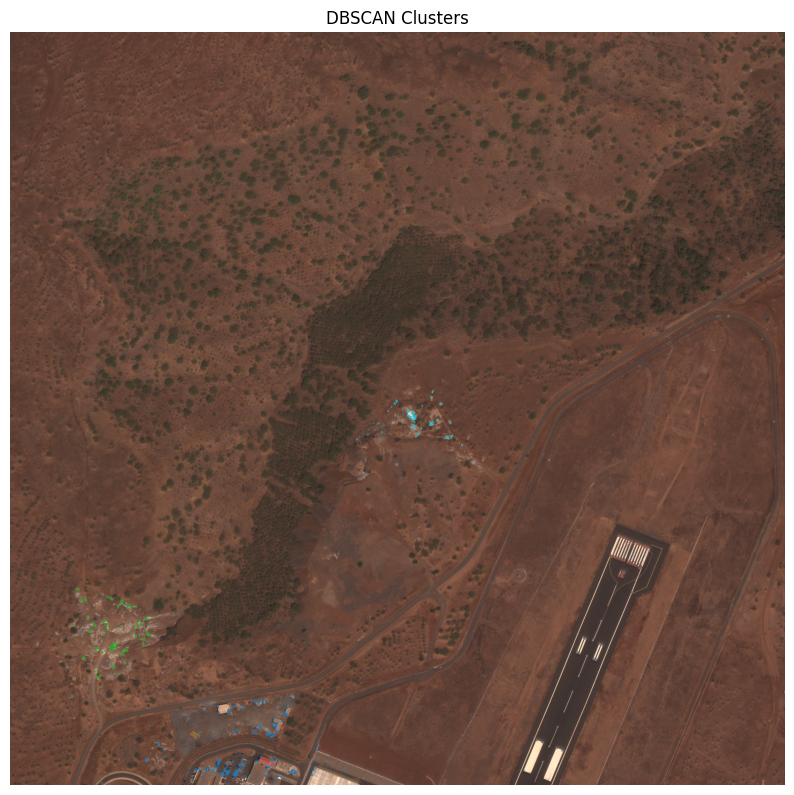

In [2]:
# === Шаг 3: Кластеризация DBSCAN ===
points = np.array([kp.pt for kp in keypoints])
scaled_points = StandardScaler().fit_transform(points)

db = DBSCAN(eps=0.2, min_samples=10).fit(scaled_points)
labels = db.labels_

# === Шаг 4: Рисуем кластеры на изображении ===
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
colors = plt.get_cmap('tab10', n_clusters)

cluster_img = image.copy()

for idx, (point, label) in enumerate(zip(points, labels)):
    if label == -1:
        color = (100, 100, 100)  # "шум"
    else:
        c = tuple(int(x * 255) for x in colors(label)[:3])
        color = c[::-1]  # BGR
    cv2.circle(cluster_img, (int(point[0]), int(point[1])), 3, color, -1)

plt.figure(figsize=(10, 10))
plt.title("DBSCAN Clusters")
plt.imshow(cv2.cvtColor(cluster_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

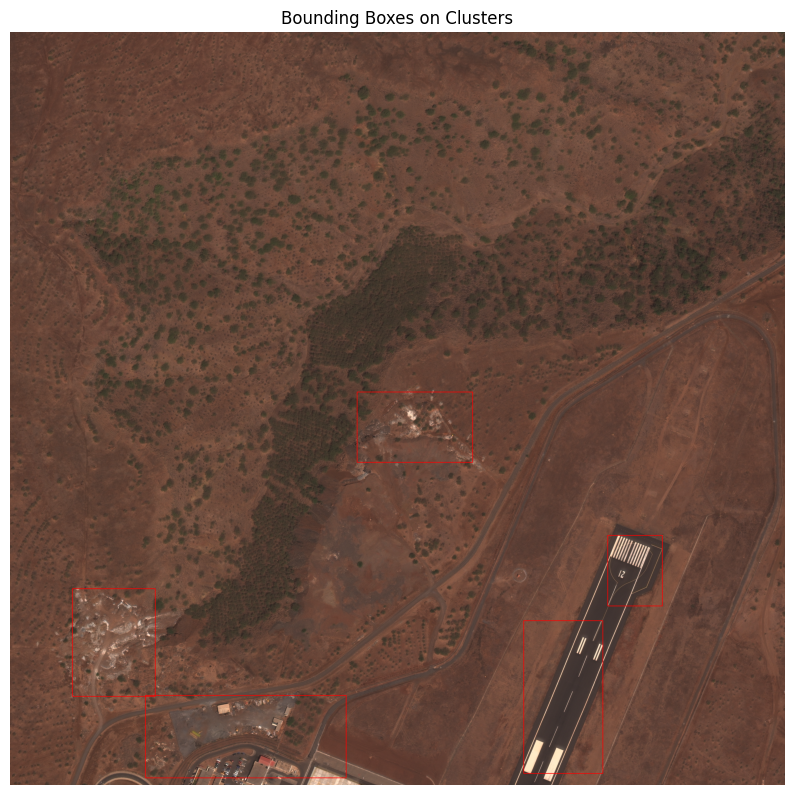

In [3]:
# === Шаг 5 и 6: Рисуем прямоугольники вокруг кластеров ===
final_img = image.copy()
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        continue  # пропускаем шум

    cluster_points = points[labels == label]
    x, y, w, h = cv2.boundingRect(cluster_points.astype(np.int32))
    cv2.rectangle(final_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.title("Bounding Boxes on Clusters")
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()